## Prepare data for DAX30 index

We are going to analyze some properties of the DAX index.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pandas.io.data as web
import datetime
import pandas.io.pytables
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from collections import OrderedDict

In [4]:
from IPython.display import display, HTML

In [5]:
HTML('<iframe src=http://finance.yahoo.com/q/cp?s=^GDAXI+Components width=1000 height=350></iframe>')

In [7]:
dax_symbols = pd.DataFrame({'Symbol': ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE'
               'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE', 'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
               'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE', 'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE']})

Get further info on the DAX components

In [8]:
HTML('<iframe src=http://en.wikipedia.org/wiki/DAX width=1000 height=350></iframe>')

In [9]:
dax_info = """Name	Branche	Logo	Indexgewichtung in %	(Letzte) Aufnahme	Sitz
Adidas	Bekleidung	Adidas-group-logo-fr.svg	1,92	22. Juni 1998	Herzogenaurach
Allianz	Versicherungen	Allianz.svg	6,90	1. Juli 1988	München
BASF	Chemie	BASF-Logo bw.svg	9,82	1. Juli 1988	Ludwigshafen am Rhein
Bayer	Chemie und Pharma	Bayer-Logo.svg	10,10	1. Juli 1988	Leverkusen
Beiersdorf	Konsumgüter	Beiersdorf Logo.svg	0,86	22. Dez. 2008	Hamburg
BMW	Automobilproduktion	BMW.svg	3,63	1. Juli 1988	München
Commerzbank	Banken	Commerzbank (2009).svg	1,34	1. Juli 1988	Frankfurt am Main
Continental	Automobilzulieferer	Continental AG logo.svg	2,26	24. Sep. 2012	Hannover
Daimler	Automobilproduktion	Daimler AG.svg	8,54	21. Dez. 19981	Stuttgart
Deutsche Bank	Banken	Deutsche Bank logo without wordmark.svg	3,50	1. Juli 1988	Frankfurt am Main
Deutsche Boerse	Boersen	Deutsche Boerse Group Logo.svg	1,25	23. Dez. 2002	Frankfurt am Main
Deutsche Post	Transport	Deutsche Post.svg	3,06	19. Mär. 2001	Bonn
Deutsche Telekom	Telekommunikation	Telekom Logo 2013.svg	4,75	18. Nov. 1996	Bonn
E.ON	Energieversorgung	EON Logo.svg	3,52	19. Juni 20001	Düsseldorf
Fresenius Medical Care	Medizintechnik	Fresenius Medical Care 20xx logo.svg	1,22	20. Sep. 1999	Hof an der Saale
Fresenius	Medizintechnik	Fresenius.svg	1,73	23. Mär. 2009	Bad Homburg vor der Höhe
HeidelbergCement	Baustoffe (Zement)	HeidelbergCement Logo.svg	1,08	21. Juni 2010	Heidelberg
Henkel	Konsumgüter	Henkel-Logo.svg	1,79	1. Juli 1988	Düsseldorf
Infineon Technologies	Halbleiter	Infineon-Logo.svg	1,25	21. Sep. 2009	Neubiberg
K+S	Chemie	Ks logo.svg	0,51	22. Sep. 2008	Kassel
Lanxess	Chemie	LanXess-Logo.svg	0,50	24. Sep. 2012	Köln
Linde	Industriegase und Anlagenbau	TheLindeGroup-Logo.svg	3,35	1. Juli 1988	München
Lufthansa	Luftfahrt	Lufthansa-Logo.svg	0,88	1. Juli 1988	Köln
Merck	Chemie und Pharma	Merck-Logo.svg	1,01	18. Juni 2007	Darmstadt
Munich Re	Versicherungen	Münchener Rück logo.svg	3,09	23. Sep. 1996	München
RWE	Energieversorgung	Logo RWE Claim.svg	1,87	1. Juli 1988	Essen
SAP	Standardsoftware	SAP 2011 logo.svg	6,31	18. Sep. 1995	Walldorf (Baden)
Siemens	Elektrotechnik	Siemens-logo.svg	9,42	1. Juli 1988	Berlin und München
ThyssenKrupp	Stahl	ThyssenKruppLogo.svg	1,10	25. Mär. 1999	Duisburg und Essen
Volkswagen	Automobilproduktion	VWAG-Logo.svg	3,42	1. Juli 1988	Wolfsburg"""

dax_info_en = """Logo	Company	Prime Standard industry group	Ticker symbol	Index weighting (%)1	Employees
Adidas Logo.svg	Adidas	Clothing	ADS	2.04	86,824
	Allianz	Insurance	ALV	6.66	151,340
BASF-Logo bw.svg	BASF	Chemicals	BAS	9.62	111,141
Bayer Logo.svg	Bayer	Pharmaceuticals and Chemicals	BAYN	7.55	111,800
Beiersdorf.svg	Beiersdorf	Consumer goods	BEI	0.86	19,130
BMW.svg	BMW	Manufacturing	BMW	3.26	102,007
	Commerzbank	Banking	CBK	1.01	56,221
	Continental	Manufacturing	CON	0.79	170,000
Daimler AG.svg	Daimler	Manufacturing	DAI	5.77	267,274
Deutsche Bank logo without wordmark.svg	Deutsche Bank	Banking	DBK	5.05	100,474
	Deutsche Boerse	Securities	DB1	1.47	3,588
	Deutsche Lufthansa	Transport Aviation	LHA	0.83	118,088
Deutsche Post DHL.svg	Deutsche Post	Communications	DPW	1.90	424,351
Deutsche Telekom.svg	Deutsche Telekom	Communications	DTE	5.38	235,132
Logo E.ON.svg	E.ON	Energy	EOAN	6.24	85,105
Fresenius.svg	Fresenius	Medical	FRE	1.63	149,351
	Fresenius Medical Care	Medical	FME	2.16	73,450
HeidelbergCement.svg	HeidelbergCement	Building	HEI	0.86	53,440
Henkel-Logo.svg	Henkel	Consumer goods	HEN3	1.53	47,753
	Infineon Technologies	Manufacturing	IFX	1.27	26,658
	K+S	Chemicals	SDF	1.18	15,170
LanXess-Logo.svg	Lanxess	Chemicals	LXS	0.73	14,650
	Linde	Industrial gases	LIN	3.81	62,000
	Merck	Pharmaceuticals	MRK	0.97	40,676
	Munich Re	Insurance	MUV2	2.92	46,915
RWE AG.svg	RWE	Energy	RWE	2.19	70,860
SAP 2011 logo.svg	SAP	IT	SAP	7.70	61,344
Siemens AG logo.svg	Siemens	Industrial, electronics	SIE	9.96	405,000
ThyssenKruppLogo.jpg	ThyssenKrupp	Industrial, manufacturing	TKA	1.33	180,050
Volkswagen Group.svg	Volkswagen Group	Manufacturing	VOW3	3.36	549,763"""

from StringIO import StringIO
df_dax_info = pd.read_table(StringIO(dax_info_en))

In [10]:
df_dax_info

,Logo,Company,Prime Standard industry group,Ticker symbol,Index weighting (%)1,Employees
0,Adidas Logo.svg,Adidas,Clothing,ADS,2.04,"86,824"
1,NaN,Allianz,Insurance,ALV,6.66,"151,340"
2,BASF-Logo bw.svg,BASF,Chemicals,BAS,9.62,"111,141"
3,Bayer Logo.svg,Bayer,Pharmaceuticals and Chemicals,BAYN,7.55,"111,800"
4,Beiersdorf.svg,Beiersdorf,Consumer goods,BEI,0.86,"19,130"
5,BMW.svg,BMW,Manufacturing,BMW,3.26,"102,007"
6,NaN,Commerzbank,Banking,CBK,1.01,"56,221"
7,NaN,Continental,Manufacturing,CON,0.79,"170,000"
8,Daimler AG.svg,Daimler,Manufacturing,DAI,5.77,"267,274"
9,Deutsche Bank logo without wordmark.svg,Deutsche Bank,Banking,DBK,5.05,"100,474"


Copy the symbols table from the Yahoo! Finance page above and read them into a Pandas DataFrame

In [11]:
df_dax_info['Symbol'] = df_dax_info['Ticker symbol'].map(lambda x: x + ".DE")
df_dax = pd.merge( df_dax_info, dax_symbols, left_on='Symbol', right_on='Symbol')

with pd.io.pytables.get_store('dax30.h5') as store:
#     store.remove('dax')
    store.append('dax', df_dax)

In [12]:
### NASDAQ100
### http://finance.yahoo.com/q/cp?s=%5ENDX

Retrieve the stock prices from Yahoo!

In [13]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2014, 1, 1)

stx = web.DataReader(df_dax.Symbol.tolist(), data_source="yahoo", start=start, end=end)

Fill in missing closing prices by copying the previous value

In [14]:
stx['Adj Close'] = stx.ix['Adj Close'].fillna(method='ffill', axis=0, limit=1)
# stx['Close'] = stx.loc['Close'].fillna(method='ffill', axis=0, limit=3)

Compute the daily returns.

$$ r(t) = log\left( \frac{p(t)}{p(t-1)} \right)$$

In [15]:
stx['Returns'] = np.log( stx.loc['Adj Close'] / stx.loc['Adj Close'].shift(1) )

In [16]:
stx.Returns.ix[datetime.datetime(2008,1,1):][stx.Returns['VOW3.DE'].isnull()]

/opt/miniconda/lib/python2.7/site-packages/pandas/core/frame.py:1808: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,DPW.DE,...,LIN.DE,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
2008-01-02,-0.024894,-0.013870,-0.004727,-0.017415,-0.011734,0.008873,-0.014173,-0.026979,-0.027835,-0.012386,...,-0.002581,NaN,-0.009678,-0.001391,NaN,-0.018367,0.027914,-0.014542,0.000701,NaN
2008-03-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
2008-03-25,0.059117,0.063901,0.021655,0.042139,0.005438,0.035041,0.085266,0.052041,0.033936,0.016458,...,0.016551,NaN,0.024225,0.037295,NaN,0.042767,0.086148,0.006727,0.008224,NaN
2008-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
with pd.io.pytables.get_store('dax30.h5') as store:
    #store.remove('stx')
    store.append('stx', stx)

### Explore the data

In [26]:
from IPython.html.widgets import interact, interactive, fixed

In [27]:
dfclose = stx['Close']
dfclose.ix[pd.Timestamp('20080807'):pd.Timestamp('20080815')].isnull().any(axis=1) #.all(axis=1)
# dfclose.fillna(method='ffill', limit=0).isnull().any(axis=1) #.plot(kind='area')

2008-08-07    True
2008-08-08    True
2008-08-11    True
2008-08-12    True
2008-08-13    True
2008-08-14    True
2008-08-15    True
dtype: bool

For info on the difference between "Close" and "Adj Close", take a look at this [discussion thread](http://quant.stackexchange.com/questions/942/any-known-bugs-with-yahoo-finance-adjusted-close-data) or this [entry]()

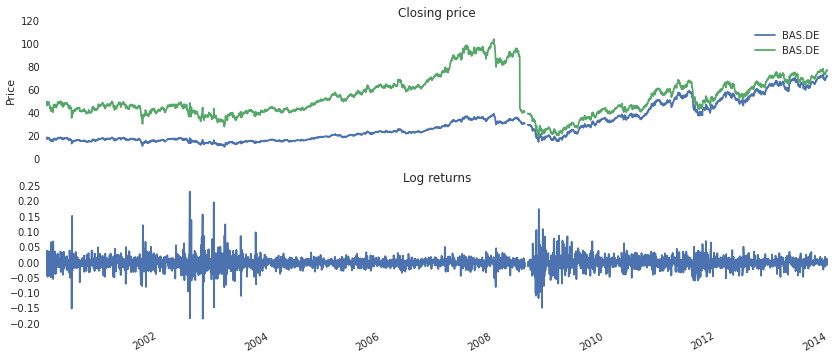

In [28]:
def plot_close(stock):
    ig, axes = plt.subplots(nrows=2, ncols=1)
    stx.ix['Adj Close'][stock].plot(legend=True, ax=axes[0], x_compat=True, figsize=(14, 6))
    stx.ix['Close'][stock].plot(legend=True, ax=axes[0], x_compat=True, figsize=(14, 6))
    
    axes[0].set_title('Closing price')
    axes[0].set_ylabel('Price')
    stx.ix['Returns'][stock].plot(legend=False, ax=axes[1], x_compat=True, figsize=(14, 6))
    axes[1].set_title('Log returns')

names_dict = OrderedDict(df_dax_info[['Symbol', 'Company']].set_index('Company').to_records() )
interact(plot_close, stock=names_dict)

Store the stock values in an HDFStore

Checking that it can be retrieved.

In [29]:
with pd.io.pytables.get_store('dax30.h5') as store:
    ret = store.select('stx').Returns
    stx = store.select('stx')

# ret.plot(legend=False, figsize=(14,6))
# ret.hist(bins=100)